<a href="https://colab.research.google.com/github/Niltonguerra/mineracaoDeDados6Semestre/blob/main/atividade_do_dia_05_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Análise de Dados com Google Colab (Foco no KDD)

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')

df.head()

Saving usa_rain_prediction_dataset_2024_2025.csv to usa_rain_prediction_dataset_2024_2025.csv


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [3]:
df.isnull().sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


In [4]:
# embora não tenha a necessidade irei colocar como seria o tratamento de valores nulos
df['Temperature'].fillna(df['Temperature'].mean(), inplace= True)

<ipython-input-4-88c75d8bbc1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace= True)


In [5]:
df['Location'].fillna('Desconhecido',inplace=True)

<ipython-input-5-4fc26f5b652d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('Desconhecido',inplace=True)


In [6]:
df['Location'] = df['Location'].astype('category')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

In [7]:
df.describe()


,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [8]:
df['Location'].value_counts()

,count
Location,
Austin,3655
Charlotte,3655
Seattle,3655
San Jose,3655
San Francisco,3655
San Diego,3655
San Antonio,3655
Phoenix,3655
Philadelphia,3655


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



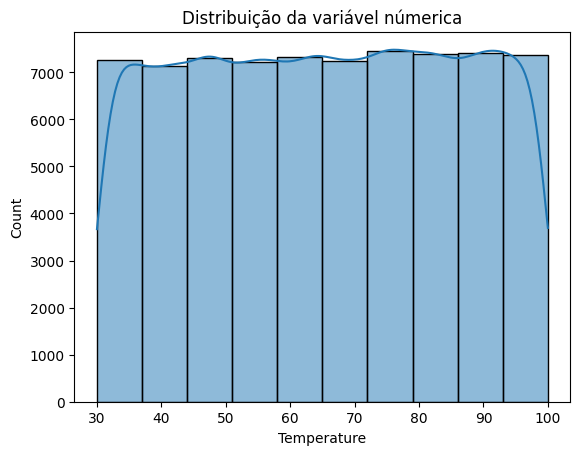

In [10]:
sns.histplot(df['Temperature'],bins=10,kde=True)
plt.title('Distribuição da variável númerica')
plt.show()

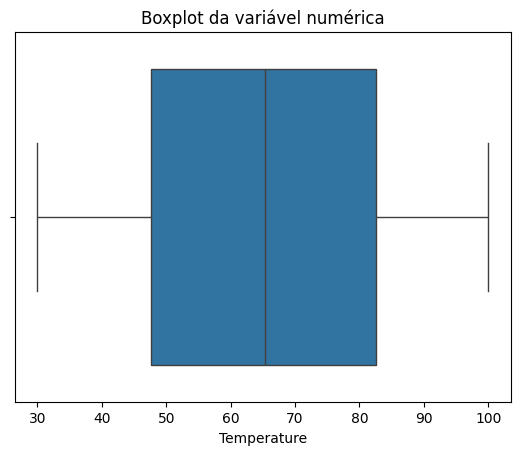

In [11]:
sns.boxplot(x= df['Temperature'])
plt.title('Boxplot da variável numérica')
plt.show()

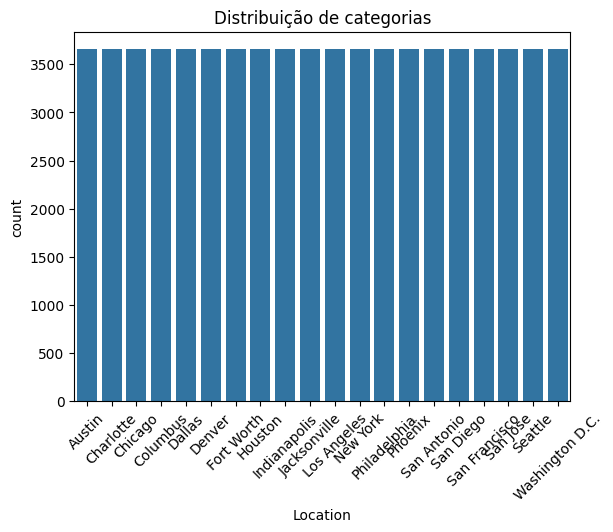

In [13]:
sns.countplot(x= df['Location'],data=df)
plt.title('Distribuição de categorias')
plt.xticks(rotation=45)
plt.show()

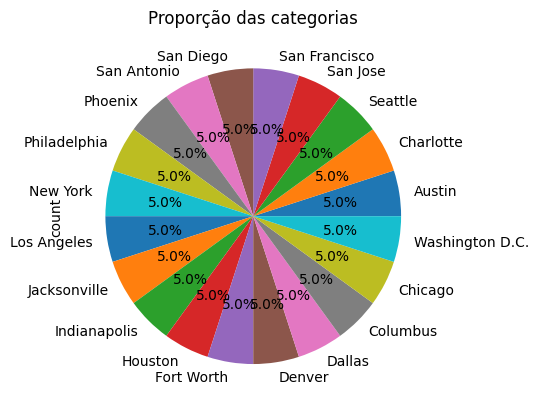

In [ ]:
df['Location'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção das categorias')
plt.show()

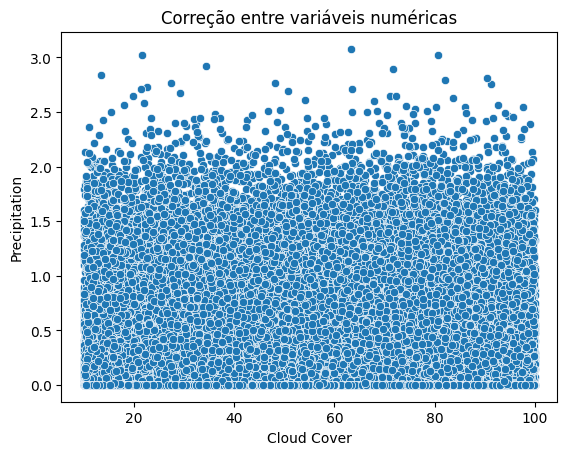

In [ ]:
sns.scatterplot(x='Cloud Cover',y='Precipitation',data=df)
plt.title('Correção entre variáveis numéricas')
plt.show()

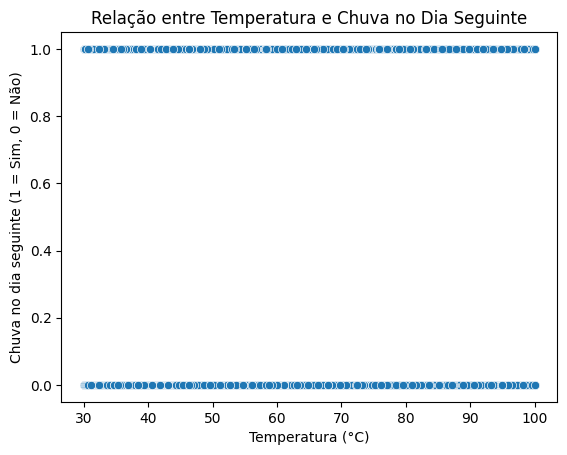

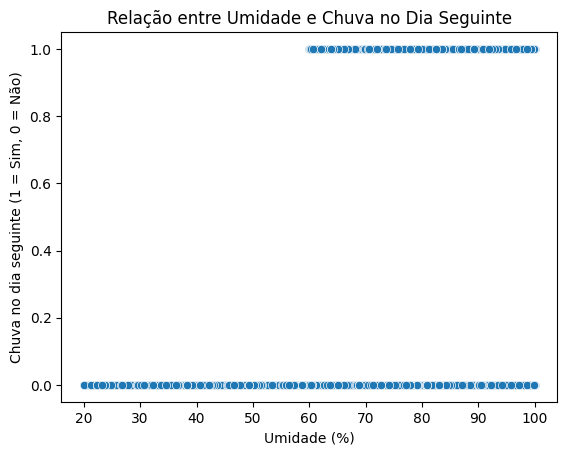

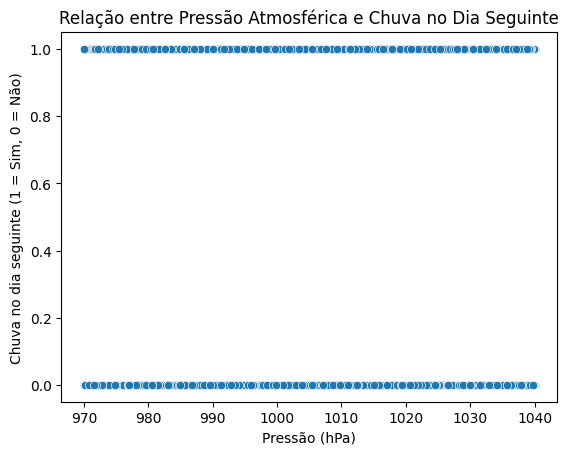

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vamos supor que 'RainTomorrow' é a variável que indica se choveu no dia seguinte (1 = Sim, 0 = Não)

# Gráfico de dispersão para a relação entre temperatura e chuva no dia seguinte
sns.scatterplot(x='Temperature', y='Rain Tomorrow', data=df)
plt.title('Relação entre Temperatura e Chuva no Dia Seguinte')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Chuva no dia seguinte (1 = Sim, 0 = Não)')
plt.show()

# Gráfico de dispersão para umidade e chuva no dia seguinte
sns.scatterplot(x='Humidity', y='Rain Tomorrow', data=df)
plt.title('Relação entre Umidade e Chuva no Dia Seguinte')
plt.xlabel('Umidade (%)')
plt.ylabel('Chuva no dia seguinte (1 = Sim, 0 = Não)')
plt.show()

# Gráfico de dispersão para pressão atmosférica e chuva no dia seguinte
sns.scatterplot(x='Pressure', y='Rain Tomorrow', data=df)
plt.title('Relação entre Pressão Atmosférica e Chuva no Dia Seguinte')
plt.xlabel('Pressão (hPa)')
plt.ylabel('Chuva no dia seguinte (1 = Sim, 0 = Não)')
plt.show()

# Outros gráficos podem ser feitos de forma similar para 'WindSpeed', 'CloudCover', etc.



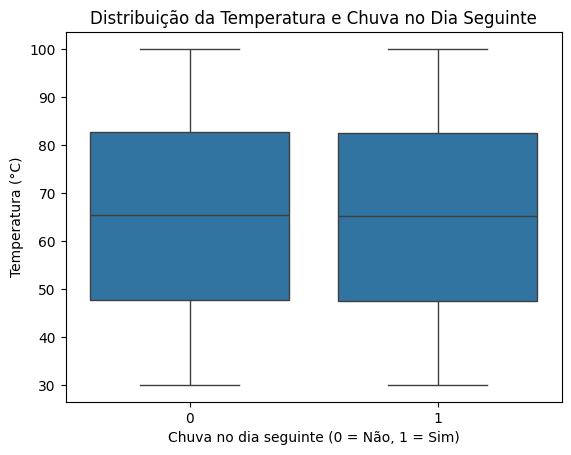

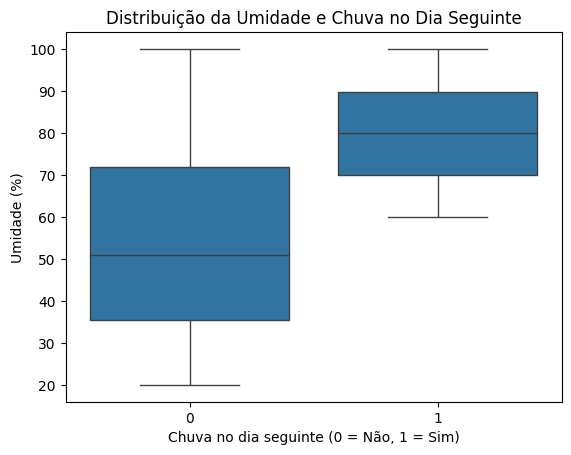

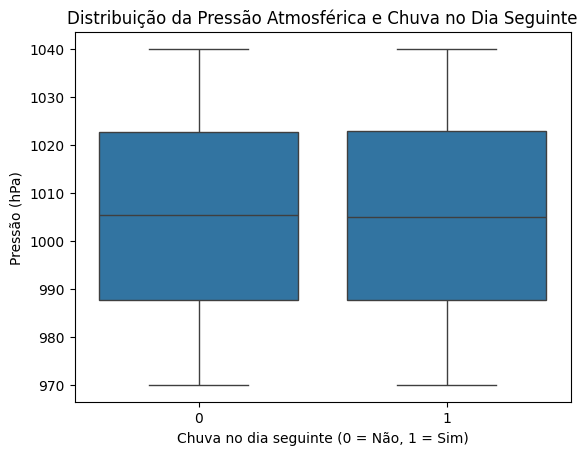

In [19]:
# Boxplot de Temperatura em relação à Chuva no Dia Seguinte
sns.boxplot(x='Rain Tomorrow', y='Temperature', data=df)
plt.title('Distribuição da Temperatura e Chuva no Dia Seguinte')
plt.xlabel('Chuva no dia seguinte (0 = Não, 1 = Sim)')
plt.ylabel('Temperatura (°C)')
plt.show()

# Boxplot de Umidade em relação à Chuva no Dia Seguinte
sns.boxplot(x='Rain Tomorrow', y='Humidity', data=df)
plt.title('Distribuição da Umidade e Chuva no Dia Seguinte')
plt.xlabel('Chuva no dia seguinte (0 = Não, 1 = Sim)')
plt.ylabel('Umidade (%)')
plt.show()

# Boxplot de Pressão Atmosférica em relação à Chuva no Dia Seguinte
sns.boxplot(x='Rain Tomorrow', y='Pressure', data=df)
plt.title('Distribuição da Pressão Atmosférica e Chuva no Dia Seguinte')
plt.xlabel('Chuva no dia seguinte (0 = Não, 1 = Sim)')
plt.ylabel('Pressão (hPa)')
plt.show()

# Outras variáveis também podem ser visualizadas dessa forma, como a Velocidade do Vento ou Cobertura de Nuvens.


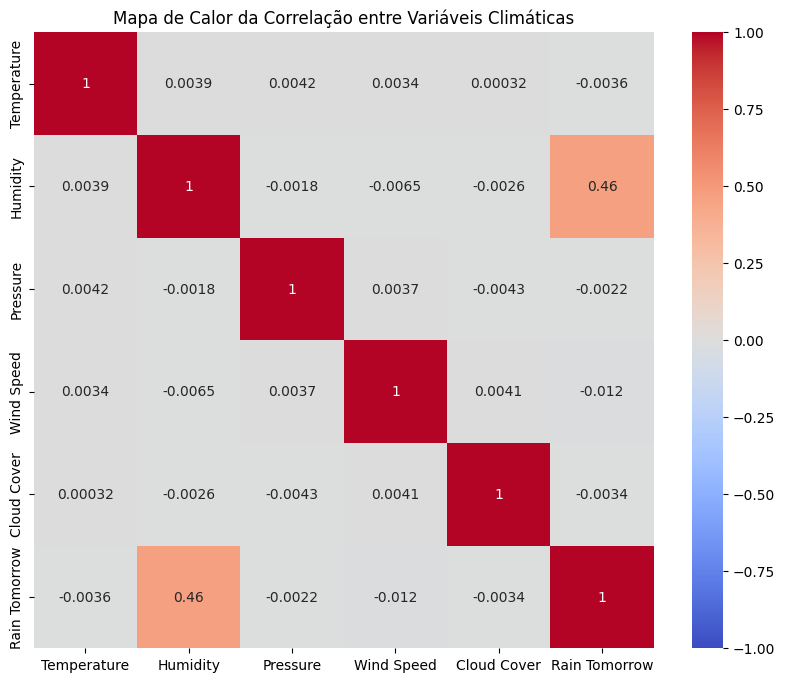

In [21]:
# Matriz de correlação
corr = df[['Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Cloud Cover', 'Rain Tomorrow']].corr()

# Heatmap da correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor da Correlação entre Variáveis Climáticas')
plt.show()



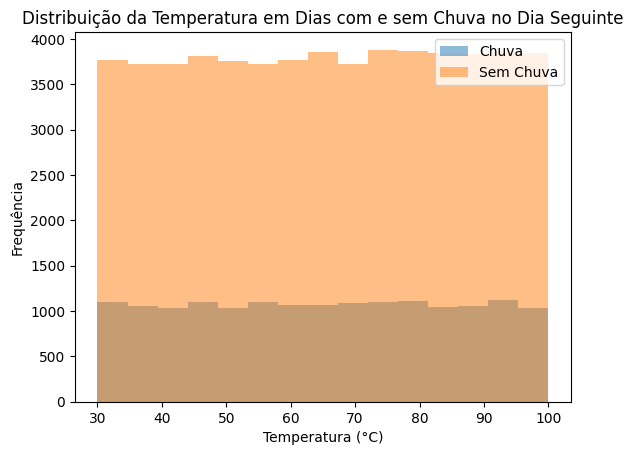

In [24]:
# Filtrando os dados para dias com e sem chuva no dia seguinte
rainy_days = df[df['Rain Tomorrow'] == 1]
non_rainy_days = df[df['Rain Tomorrow'] == 0]

# Histograma de Temperatura para dias com e sem chuva
plt.hist(rainy_days['Temperature'], bins=15, alpha=0.5, label='Chuva')
plt.hist(non_rainy_days['Temperature'], bins=15, alpha=0.5, label='Sem Chuva')
plt.title('Distribuição da Temperatura em Dias com e sem Chuva no Dia Seguinte')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Histogramas semelhantes podem ser criados para Umidade, Pressão, etc.


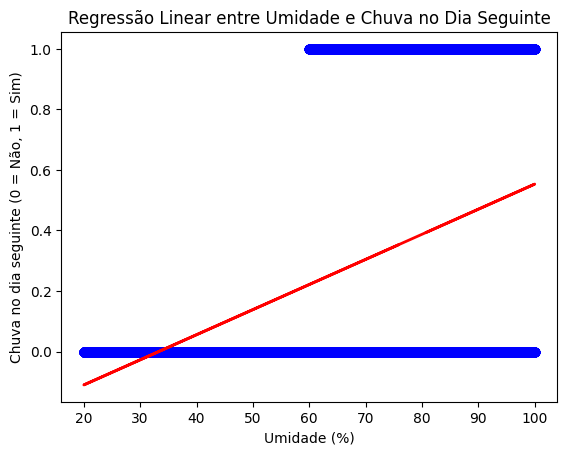

In [26]:
from sklearn.linear_model import LinearRegression

# Definindo as variáveis independentes (exemplo: Umidade) e dependentes (RainTomorrow)
X = df[['Humidity']]
y = df['Rain Tomorrow']

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Plotando a linha de regressão
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Regressão Linear entre Umidade e Chuva no Dia Seguinte')
plt.xlabel('Umidade (%)')
plt.ylabel('Chuva no dia seguinte (0 = Não, 1 = Sim)')
plt.show()


1. Quais padrões você observou nas variáveis numéricas? (exemplo:
distribuição normal, outliers)<br>
resposta: eu reparei na distribuição que os valores seguem bem uniformes,sem nenhum outliers parace que os dados sempre seguem de acordo com um padrão bem previsivel durante todo o ano, ela possui uma distribuição normal


2. Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?<br>
Resposta:não, na verdade todos os dados de toda a tabela não tinham valores nulos, todos os campos de todas as colunas estavam preenchidos totalmente


3. Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?<br>
Resposta: sim, reparei que quando a umidade está entorno de 60 porcento muito provavelmente no dia seguinte irá ter uma chuva


4. Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?<br>
Resposta: constatei que nos dados apresentam que tem chuva no dia seguinte com frequencia quando a humidade está chegando nos 60 pontos, outra coisa que constatei é que a temperatura não impacta muito probabilidade de chover no dia seguinte ou não, além disso que em uma relação entre umidade e chuva no dia seguinte apenas começa no 60 pontos aproximadamente e que a mediana está por volta dos 80 pontos e chega até proximo de 90 pontos no terceiro quartil.